# Assignment 2 - Machine Learning Basics

## *Frank*
Netid:  *hx44*

Github link: *https://github.com/Frank-Xu-Huaze/machine-learning-course/blob/master/2/Assignment%202.ipynb*

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

1. For a large sample size, we are less likely to overfit, so **a more flexible model will perform better**, to reduce bias.

2. For a small sample size, we are more likely to overfit when using a flexible model, so **an inflexible model will be better**.

3. **A more flexible model should preform better**, because the non-linear relation is usually better presented by a flexible model.

4. **An inflexible model would do better**, because a flexible model will capture more undesired noise (error) in the sample.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

(a) Regression problem. We are most interested in inference, sample size n = 500, predictors p = 3.

(b) Classification problem. We are most interested in prediction, sample size n = 20, predictors p = 13.

(c) Regression problem. We are most interested in prediction, sample size n = 52, predictors p = 3.

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

In [5]:
# (a) Write your own kNN classifier
import numpy as np

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        pass
    
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x = x
        self.y = y

    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        for testx in x:
            distance = [] # List of distance between test point and each train points
            for i in range(len(self.x)):
                dis = np.array(testx) - np.array(self.x[i])
                distance.append((np.dot(dis, dis), self.y[i]))
            knearest = sorted(distance, key = lambda x: x[0])[:k] # Sorted by distance and keep only the first k elements
            y_k = list(zip(*knearest))[1] # Create a new list with only y values
            y_hat.append(1 if np.mean(y_k) >= 0.5 else 0)
        # Return the estimated targets
        return np.array(y_hat)

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(np.array(y) == np.array(y_hat)) / nvalues
    return accuracy

In [6]:
# (b) ~ (d) Evaluate the performance of your kNN classifier and KNeighborsClassifier on a low- and a high-dimensional dataset and time the predictions of each
import time
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

for i in ['low', 'high']:
    # first run knn
    url = 'https://raw.githubusercontent.com/Frank-Xu-Huaze/ids705/master/assignments/data/'
    # Read in csv from github
    X_train = pd.read_csv(url + 'A2_X_train_' + i + '.csv', header = None).values
    Y_train = pd.read_csv(url + 'A2_y_train_' + i + '.csv', header = None).values
    X_test = pd.read_csv(url + 'A2_X_test_' + i + '.csv', header = None).values
    Y_test = pd.read_csv(url + 'A2_y_test_' + i + '.csv', header = None).values
    # Set a timer
    t0 = time.time()
    # load training data
    KNN = Knn()
    KNN.fit(X_train, Y_train)
    # calculate accuracy
    acc = accuracy(list(Y_test.flat), KNN.predict(X_test, k = 5))
    print('The accuracy of Knn on {} dimensional data is: {}\n and the time elapsed is: {} secs'.format(i, acc, time.time() - t0))
    
    # then run KNeighborsClassifier
    t1 = time.time()
    KNN2 = KNeighborsClassifier(n_neighbors = 5)
    KNN2.fit(X_train, list(Y_train.flat)) 
    acc = accuracy(list(Y_test.flat), KNN2.predict(X_test))
    print('The accuracy of KNeighborsClassifier on {} dimensional data is: {}\n and the time elapsed is: {} secs'.format(i, acc, time.time() - t1))
    

The accuracy of Knn on low dimensional data is: 0.925
 and the time elapsed is: 2.8183059692382812 secs
The accuracy of KNeighborsClassifier on low dimensional data is: 0.925
 and the time elapsed is: 0.01253199577331543 secs
The accuracy of Knn on high dimensional data is: 0.993
 and the time elapsed is: 3.0792009830474854 secs
The accuracy of KNeighborsClassifier on high dimensional data is: 0.993
 and the time elapsed is: 0.1431581974029541 secs


**(d), (e)**

Compared with KNeighborsClassifier from Sklearn, my Knn classifier has same accuracy, but much slower speed.

As the size of dataset grows and as more complicated the algorithm becomes, the learning and predicting process will take more and more time. In certain situations, people expect predictions in a very short time to solve real-time problems, and a slow process could be the major drawback.

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

**ANSWER**:

In [51]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

test_x = np.array([0, 0, 0])

def distance(train_x, train_y, test_x):
    distance = []
    for i in range(len(train_y)):
        dis = np.array(train_x[i]) - np.array(test_x)
        distance.append((np.dot(dis, dis), y[i]))
    return distance

def predict_y(train_x, train_y, test_x, k):
    dis = sorted(distance(X, y, test_x), key = lambda x: x[0])[:k]
    y_k = list(zip(*dis))[1]
    count = [[x,y_k.count(x)] for x in set(y_k)]
    return sorted(count, key = lambda x: x[1])

# (a)
pd.DataFrame(data = distance(X, y, test_x), index = list(range(1,7)), columns = ['distance', 'y'])

,distance,y
1,9,r
2,4,r
3,10,r
4,5,b
5,2,b
6,3,r


In [107]:
# (b) See the Knn result of k = 1
k1 = predict_y(X, y, test_x, 1)
print('(b) The k = 1 nearest color and count is:', k1,'Therefore the color predicted is:', k1[-1][0])

# See the Knn result of k = 3
k2 = predict_y(X, y, test_x, 3)
print('(c) The k = 3 nearest colors and counts are:', k2,'Therefore the color predicted is:', k2[-1][0])

(b) The k = 1 nearest color and count is: [['b', 1]] Therefore the color predicted is: b
(c) The k = 3 nearest colors and counts are: [['b', 1], ['r', 2]] Therefore the color predicted is: r


(d) When the optimal boundary is highly non-linear, as we discussed in first question, we need a more flexble model, which in this case, a Knn model with smaller K.


## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

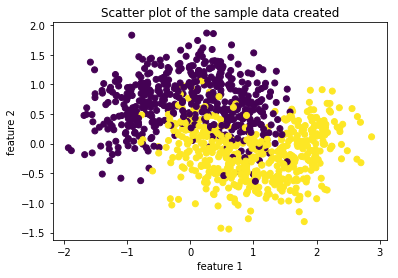

In [3]:
# (a) ~ (b)
# Creating a synthetic dataset
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import random

X, Y = make_moons(n_samples = 1000, noise = 0.35)

# Scatter Plot
plt.scatter(list(zip(*X))[0],list(zip(*X))[1], c = Y)
plt.title('Scatter plot of the sample data created')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

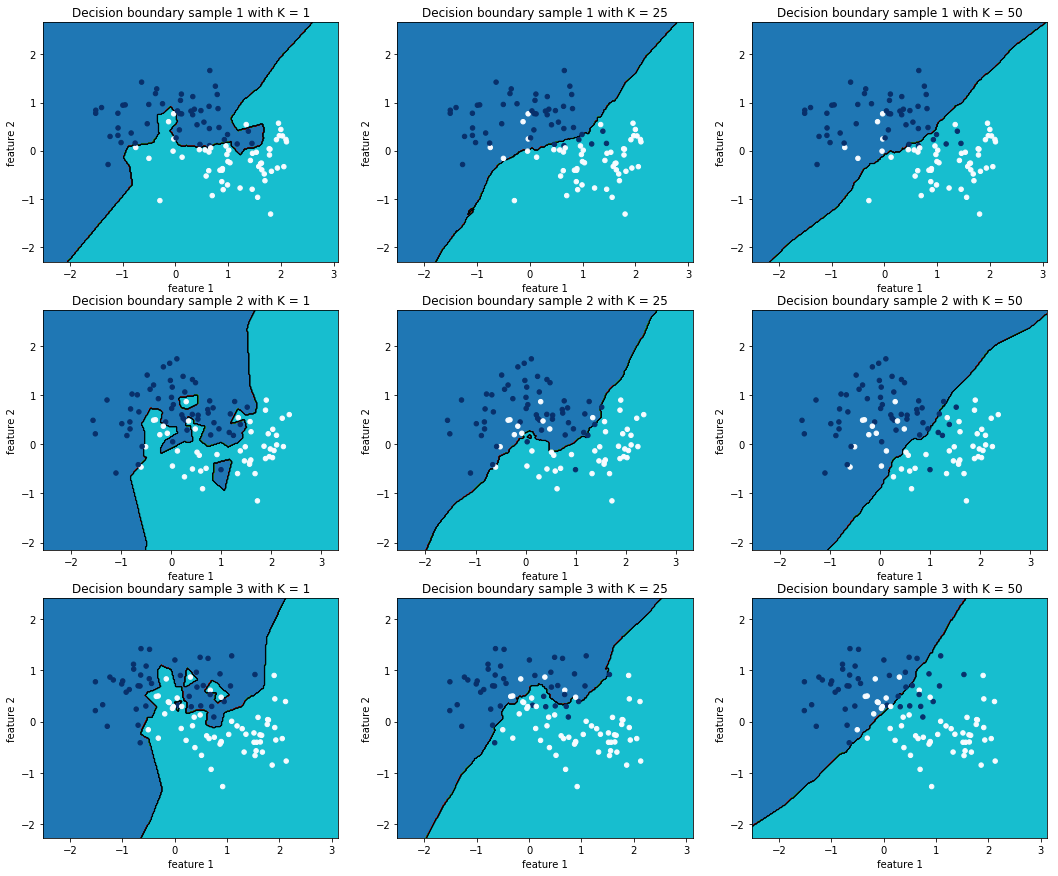

In [8]:
# (c) ~ (d)
from sklearn.neighbors import KNeighborsClassifier

sub = 1
for i in range(1,4):
    # Creating 3 sample size as training data
    index = random.sample(range(0, 1000), 100)
    xdata = X[index]
    ydata = Y[index]
    for k in [1, 25, 50]: # Creating 3 different k values for each sample
        # create a mesh as test data
        x_min, x_max = xdata[:, 0].min() - 1, xdata[:, 0].max() + 1
        y_min, y_max = xdata[:, 1].min() - 1, xdata[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                             np.arange(y_min, y_max, 0.02))
        KNN = KNeighborsClassifier(n_neighbors = k)
        # load train data and classify on test data
        KNN.fit(xdata, ydata)
        Z = KNN.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plotting
        plt.subplot(3, 3, sub)
        plt.contourf(xx, yy, Z, cmap = 'tab10', zorder = 1)
        plt.contour(xx, yy, Z, colors = "Black", linewidths = 0.5, zorder = 2)
        plt.scatter(xdata.T[0],xdata.T[1], c = ydata, s = 20, cmap = 'Blues_r', zorder = 3)
        plt.title('Decision boundary sample {} with K = {}'.format(i, k))
        plt.xlabel('feature 1')
        plt.ylabel('feature 2')
        sub +=1
        
# Changing plot size
plt.rcParams["figure.figsize"][0], plt.rcParams["figure.figsize"][1] = 18, 15
plt.show()

***(e) ~ (f)***

The first column (three samples with K = 1) has perfect prediction, or overfitting for those samples, because K = 1. They seems to fit great, but mostly, they would not do good on test datasets.

The second column (three samples with K = 25) has relatively good prediction. They are neither overfitting nor lacking too much accuracy.

The third column (three samples with K = 50) fit the three samples relatively bad. The model with K = 50 is too inflexible.

The model with K = 1 has too much variance: the line between prediction is too jagged. However, the model with K = 50 has too much bias: the line is too smooth to tell the signals from the data. In comparison, the model with K = 25 has the best overall error, which is when variance and bias reach an optimal balance.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**:

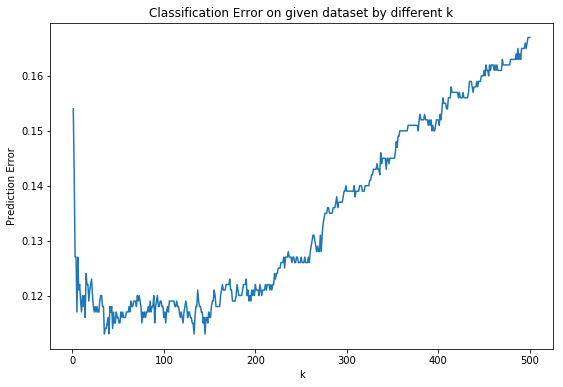

In [11]:
# (a) ~ (b)
# Creating new testing dataset
Xtest, Ytest = make_moons(n_samples = 1000, noise = 0.35)
Xtrain, Ytrain = X, Y

# Creating array for K and Error
K = np.arange(1, 501, 1)
Error = np.empty(500)

# Calculating Error for each k
for k in K:
    KNN = KNeighborsClassifier(n_neighbors = k)
    KNN.fit(Xtrain, Ytrain)
    Error[k-1] = 1 - np.mean(KNN.predict(Xtest) == Ytest)

# Store K and Error into a dataframe
error = pd.DataFrame({'k': K,
                    'Error': Error})

plt.rcParams["figure.figsize"][0], plt.rcParams["figure.figsize"][1] = 9, 6
plt.plot(error.k, error.Error)
plt.title('Classification Error on given dataset by different k')
plt.xlabel('k')
plt.ylabel('Prediction Error')
plt.show()

***(c) ~ (f)***

The error of the classifier dropped in the beginning as the k goes up, reaches bottom when k is about 20, then with the increase of k, the error also goes up.

As k = 1 is perfect prediction, it represent high variance. K = 500 represent high bias (underfit)

The optimal k is around k = 20, because the overall error reaches bottom. This means the variance and bias are in an optimal balance.

For example, in a polynomial regression model, the higher the power is and the more predictors there are, the more flexible the model is.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [222]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

**ANSWER**:

41

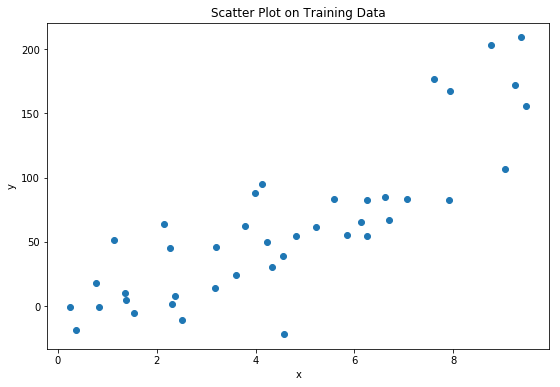

In [241]:
# (a)
plt.scatter(x_train, y_train)
plt.title('Scatter Plot on Training Data')
plt.xlabel('x')
plt.ylabel('y')

In [244]:
# (b)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x0_train = np.array([x_train]).T

# Train model
reg = LinearRegression().fit(x0_train, y_train)

# Getting coefficients and intercept
a1 = reg.coef_[0]
a0 = reg.intercept_

# Calculating R square and MSE
R2 = reg.score(x0_train, y_train)
y_pred = reg.predict(x0_train)
mse = mean_squared_error(y_train, y_pred)
print('The linear model is y = {} + {}x\nThe R square is {}\nThe mean square error is {}'.format(a0, a1, R2, mse))

The linear model is y = -21.73078292905422 + 18.303206847693165x
The R square is 0.7014590913812251
The mean square error is 1052.5853662498014


In [256]:
# (c)
# The scatter plot shows a clear convex sign on the function.
# Let's try adding an exponential transformation

# Creating a new x_train data with exponential transformation
x1_train = np.array([x_train,np.exp(x_train)]).T

# Train model and get all the parameters
reg_exp = LinearRegression().fit(x1_train, y_train)
R2_1 = reg_exp.score(x1_train, y_train)
y_pred = reg_exp.predict(x1_train)
mse_1 = mean_squared_error(y_train, y_pred)
print('The exponential linear model is y = {} + {}x + {}exp(x)\nThe R square is {}\nThe mean square error is {}\n'.format(reg_exp.intercept_,
                                                                                                                        reg_exp.coef_[0], 
                                                                                                                        reg_exp.coef_[1], 
                                                                                                                        R2_1, mse_1))

# Let's try adding a quadratic transformation

# Creating a new x_train data with quadratic transformation
x2_train = np.array([x_train,np.array(x_train)**2]).T

# Train model and get all the parameters
reg_quad = LinearRegression().fit(x2_train, y_train)
R2_2 = reg_quad.score(x2_train, y_train)
y_pred = reg_quad.predict(x2_train)
mse_2 = mean_squared_error(y_train, y_pred)
print('The quadratic linear model is y = {} + {}x + {}x^2\nThe R square is {}\nThe mean square error is {}'.format(reg_quad.intercept_, 
                                                                                                                   reg_quad.coef_[0], 
                                                                                                                   reg_quad.coef_[1], 
                                                                                                                   R2_2, mse_2))

The exponential linear model is y = -9.22448701223616 + 13.901840520851021x + 0.004989687992531652exp(x)
The R square is 0.7399298908954008
The mean square error is 916.946331774093

The quadratic linear model is y = 8.00733746158965 + 0.47100686043855106x + 1.8320819097372585x^2
The R square is 0.7490480719353505
The mean square error is 884.797759660905


#### Comparing the two new models, the quadratic is slightly better, so we will adopt quadratic as our transformed model.

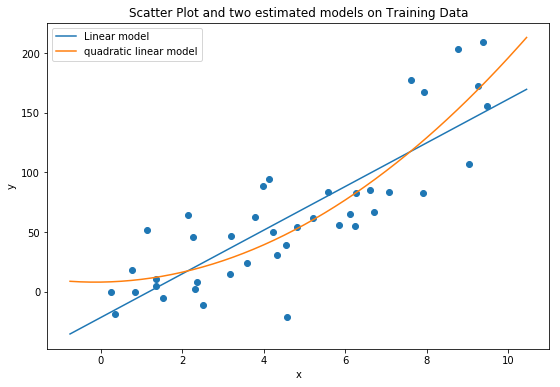

In [265]:
# (d) Re-plotting

X = np.arange(np.min(x_train)-1, np.max(x_train)+1, 0.05)
Y0 = reg.intercept_ + reg.coef_[0]*X
Y1 = reg_quad.intercept_ + reg_quad.coef_[0]*X + reg_quad.coef_[1]* (X**2)

plt.scatter(x_train, y_train, zorder = 1)
plt.plot(X, Y0, zorder = 2, label='Linear model')
plt.plot(X, Y1, zorder = 3, label='quadratic linear model')
plt.title('Scatter Plot and two estimated models on Training Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [267]:
# (e) Examine on Test dataset
# Clearing x data
X0 = np.array([x_test]).T
X1 = np.array([x_test,np.array(x_test)**2]).T

# Calculating parameters
R2_0 = reg.score(X0, y_test)
R2_1 = reg_quad.score(X1, y_test)
y0_pred = reg.predict(X0)
mse_0 = mean_squared_error(y_test, y0_pred)
y1_pred = reg_quad.predict(X1)
mse_1 = mean_squared_error(y_test, y1_pred)

print('The R square of linear model on test dataset is {}, and the MSE is {}'.format(R2_0, mse_0))
print('The R square of linear quadratic model on test dataset is {}, and the MSE is {}'.format(R2_1, mse_1))

The R square of linear model on test dataset is 0.5556465885794163, and the MSE is 2023.3121088887128
The R square of linear quadratic model on test dataset is 0.6927820089560344, and the MSE is 1398.881758014395


(f) The linear quadratic model performs better on the test data, because it has larger R square and smaller MSE. From the perspective of data, it is because the test data shows more of a non-linear trend.

(g) Another test data set would have a totally different result. If the test data is more linear, the linear model will probably do better. After all, my model was trained for the trainning data set, not the "significantly" different new dataset.